## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1          X2        X3        X4           Y
0  55.553706  422.691106  0.132528  2.084425   78.920300
1  93.197330  533.393009  0.152632  5.259798  123.766143
2  68.133364  466.955390  0.306414  7.814276  158.411940
3  93.602177  713.909197  0.219906  2.288568  182.785896
4  74.582646  563.188804  0.888421  1.949593  505.876007


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0216297	total: 58.1ms	remaining: 58s
1:	learn: 1.0094315	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9989992	total: 59ms	remaining: 19.6s
3:	learn: 0.9853458	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9713272	total: 60ms	remaining: 11.9s
5:	learn: 0.9592019	total: 60.5ms	remaining: 10s
6:	learn: 0.9461399	total: 61ms	remaining: 8.65s
7:	learn: 0.9333544	total: 61.5ms	remaining: 7.63s
8:	learn: 0.9197537	total: 62.1ms	remaining: 6.84s
9:	learn: 0.9062320	total: 62.5ms	remaining: 6.19s
10:	learn: 0.8939879	total: 63ms	remaining: 5.66s
11:	learn: 0.8805684	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8670000	total: 64ms	remaining: 4.86s
13:	learn: 0.8544804	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8421948	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8320390	total: 65.3ms	remaining: 4.01s
16:	learn: 0.8204863	total: 65.9ms	remaining: 3.81s
17:	learn: 0.8103011	total: 66.4ms	remaining: 3.62s
18:	learn: 0.8026861	total: 66.8ms	remaining: 3.45s
19:	le

105:	learn: 0.2729118	total: 108ms	remaining: 910ms
106:	learn: 0.2693981	total: 108ms	remaining: 905ms
107:	learn: 0.2658045	total: 109ms	remaining: 900ms
108:	learn: 0.2627744	total: 109ms	remaining: 894ms
109:	learn: 0.2597361	total: 110ms	remaining: 888ms
110:	learn: 0.2572920	total: 110ms	remaining: 883ms
111:	learn: 0.2542648	total: 111ms	remaining: 877ms
112:	learn: 0.2516723	total: 111ms	remaining: 872ms
113:	learn: 0.2491866	total: 111ms	remaining: 866ms
114:	learn: 0.2462933	total: 112ms	remaining: 861ms
115:	learn: 0.2438228	total: 112ms	remaining: 856ms
116:	learn: 0.2411143	total: 113ms	remaining: 851ms
117:	learn: 0.2386650	total: 113ms	remaining: 847ms
118:	learn: 0.2362770	total: 114ms	remaining: 841ms
119:	learn: 0.2341751	total: 114ms	remaining: 836ms
120:	learn: 0.2315997	total: 114ms	remaining: 831ms
121:	learn: 0.2287713	total: 115ms	remaining: 827ms
122:	learn: 0.2261873	total: 116ms	remaining: 824ms
123:	learn: 0.2240224	total: 116ms	remaining: 819ms
124:	learn: 

271:	learn: 0.0602490	total: 186ms	remaining: 498ms
272:	learn: 0.0597748	total: 187ms	remaining: 497ms
273:	learn: 0.0594108	total: 187ms	remaining: 496ms
274:	learn: 0.0589881	total: 188ms	remaining: 494ms
275:	learn: 0.0585981	total: 188ms	remaining: 493ms
276:	learn: 0.0582328	total: 188ms	remaining: 492ms
277:	learn: 0.0578435	total: 189ms	remaining: 491ms
278:	learn: 0.0574298	total: 189ms	remaining: 489ms
279:	learn: 0.0570619	total: 190ms	remaining: 488ms
280:	learn: 0.0567210	total: 190ms	remaining: 487ms
281:	learn: 0.0563205	total: 191ms	remaining: 485ms
282:	learn: 0.0559720	total: 191ms	remaining: 484ms
283:	learn: 0.0556073	total: 192ms	remaining: 483ms
284:	learn: 0.0552536	total: 192ms	remaining: 482ms
285:	learn: 0.0548679	total: 192ms	remaining: 480ms
286:	learn: 0.0545575	total: 193ms	remaining: 479ms
287:	learn: 0.0542739	total: 193ms	remaining: 478ms
288:	learn: 0.0538883	total: 194ms	remaining: 477ms
289:	learn: 0.0536156	total: 194ms	remaining: 476ms
290:	learn: 

498:	learn: 0.0238447	total: 289ms	remaining: 290ms
499:	learn: 0.0237938	total: 290ms	remaining: 290ms
500:	learn: 0.0237109	total: 290ms	remaining: 289ms
501:	learn: 0.0236069	total: 291ms	remaining: 288ms
502:	learn: 0.0234916	total: 291ms	remaining: 288ms
503:	learn: 0.0233756	total: 291ms	remaining: 287ms
504:	learn: 0.0233000	total: 292ms	remaining: 286ms
505:	learn: 0.0232333	total: 292ms	remaining: 286ms
506:	learn: 0.0231847	total: 293ms	remaining: 285ms
507:	learn: 0.0231024	total: 293ms	remaining: 284ms
508:	learn: 0.0230572	total: 294ms	remaining: 283ms
509:	learn: 0.0230120	total: 294ms	remaining: 283ms
510:	learn: 0.0229588	total: 295ms	remaining: 282ms
511:	learn: 0.0228554	total: 295ms	remaining: 281ms
512:	learn: 0.0227925	total: 296ms	remaining: 281ms
513:	learn: 0.0227487	total: 296ms	remaining: 280ms
514:	learn: 0.0227056	total: 297ms	remaining: 279ms
515:	learn: 0.0226118	total: 297ms	remaining: 279ms
516:	learn: 0.0225585	total: 297ms	remaining: 278ms
517:	learn: 

672:	learn: 0.0129774	total: 368ms	remaining: 179ms
673:	learn: 0.0129483	total: 368ms	remaining: 178ms
674:	learn: 0.0129312	total: 369ms	remaining: 178ms
675:	learn: 0.0128735	total: 369ms	remaining: 177ms
676:	learn: 0.0128428	total: 370ms	remaining: 176ms
677:	learn: 0.0128102	total: 370ms	remaining: 176ms
678:	learn: 0.0127710	total: 371ms	remaining: 175ms
679:	learn: 0.0127433	total: 371ms	remaining: 175ms
680:	learn: 0.0126536	total: 372ms	remaining: 174ms
681:	learn: 0.0125661	total: 372ms	remaining: 174ms
682:	learn: 0.0125562	total: 373ms	remaining: 173ms
683:	learn: 0.0125191	total: 373ms	remaining: 172ms
684:	learn: 0.0124341	total: 374ms	remaining: 172ms
685:	learn: 0.0123475	total: 374ms	remaining: 171ms
686:	learn: 0.0123121	total: 375ms	remaining: 171ms
687:	learn: 0.0122312	total: 375ms	remaining: 170ms
688:	learn: 0.0121677	total: 375ms	remaining: 169ms
689:	learn: 0.0121069	total: 376ms	remaining: 169ms
690:	learn: 0.0120570	total: 376ms	remaining: 168ms
691:	learn: 

892:	learn: 0.0059427	total: 471ms	remaining: 56.4ms
893:	learn: 0.0059345	total: 472ms	remaining: 55.9ms
894:	learn: 0.0059201	total: 472ms	remaining: 55.4ms
895:	learn: 0.0059023	total: 473ms	remaining: 54.9ms
896:	learn: 0.0058882	total: 473ms	remaining: 54.3ms
897:	learn: 0.0058820	total: 474ms	remaining: 53.8ms
898:	learn: 0.0058725	total: 474ms	remaining: 53.3ms
899:	learn: 0.0058474	total: 475ms	remaining: 52.7ms
900:	learn: 0.0058255	total: 475ms	remaining: 52.2ms
901:	learn: 0.0057962	total: 476ms	remaining: 51.7ms
902:	learn: 0.0057750	total: 476ms	remaining: 51.1ms
903:	learn: 0.0057544	total: 476ms	remaining: 50.6ms
904:	learn: 0.0057313	total: 477ms	remaining: 50.1ms
905:	learn: 0.0057074	total: 478ms	remaining: 49.5ms
906:	learn: 0.0056768	total: 478ms	remaining: 49ms
907:	learn: 0.0056479	total: 479ms	remaining: 48.5ms
908:	learn: 0.0056188	total: 479ms	remaining: 48ms
909:	learn: 0.0055897	total: 479ms	remaining: 47.4ms
910:	learn: 0.0055795	total: 480ms	remaining: 46.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

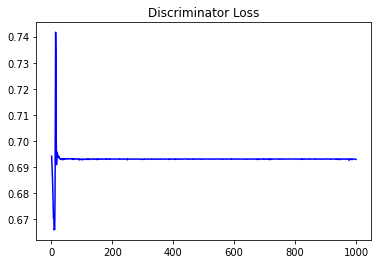

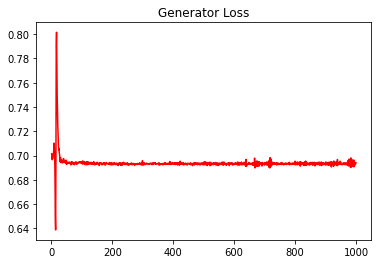

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.011585128806934835


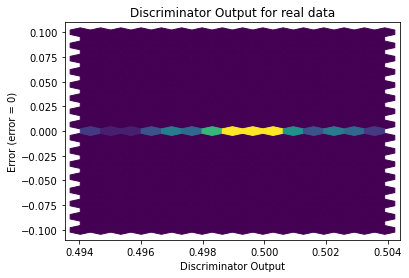

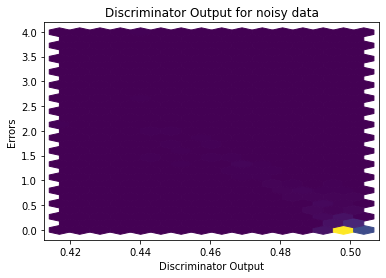

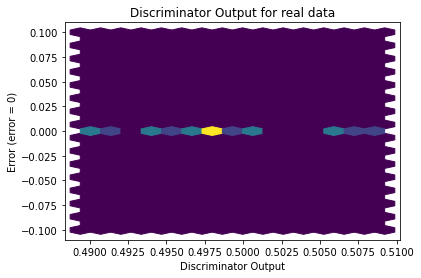

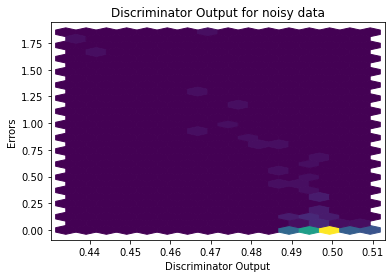

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


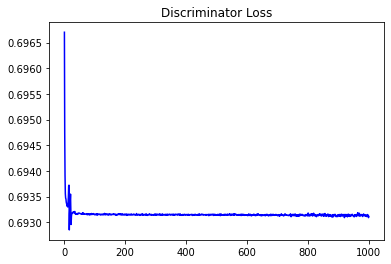

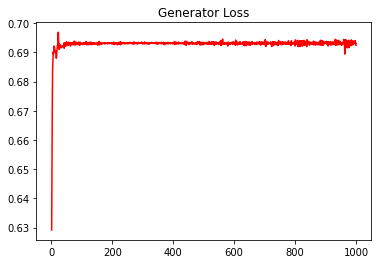

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.026667449733859497


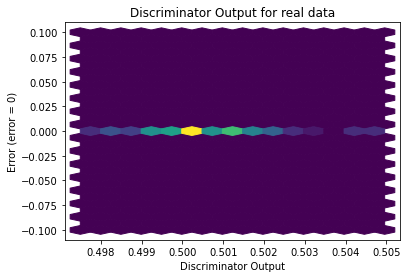

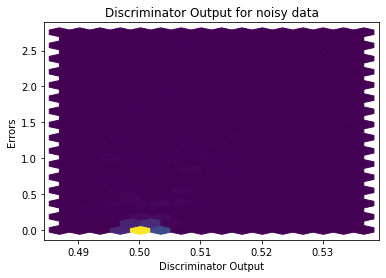

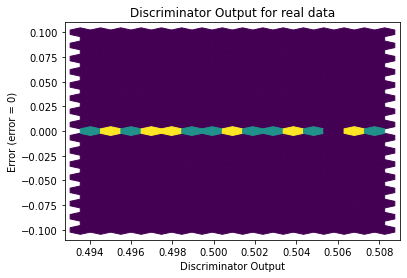

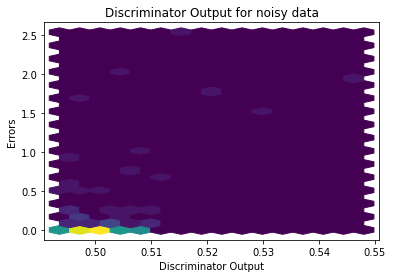

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
